UPLOADING FILE

 HR Analytics Employee Attrition & Performance

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


IMPORTING DATASET

In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


DATA CLEANING

In [ ]:

import pandas as pd

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display initial dataset info
print("Initial Dataset Info:")
print(data.info())

# Step 1: Handle Missing Values
# Count missing values per column
missing_counts = data.isnull().sum()
print("\nMissing Values Per Column:")
print(missing_counts)

# Fill or drop missing values based on column type and importance
# Example: Dropping columns with excessive missing values or imputing with median/mode
threshold = 0.5 * len(data)  # 50% threshold
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])

# Fill remaining missing values
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical
        data[col].fillna(data[col].median(), inplace=True)

# Step 2: Handle Duplicates
data = data.drop_duplicates()

# Step 3: Convert Data Types (if needed)
# Example: Convert categorical columns to 'category' type for optimization
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

# Step 4: Remove Outliers (if applicable)
# Example: Using the Interquartile Range (IQR) method for numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Step 5: Rename Columns (if needed for consistency)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

# Save the cleaned dataset
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData Cleaning Complete. Cleaned dataset saved to:", cleaned_file_path)


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       199 non-null    int64 
 1   Attrition                 199 non-null    object
 2   BusinessTravel            199 non-null    object
 3   DailyRate                 199 non-null    int64 
 4   Department                199 non-null    object
 5   DistanceFromHome          199 non-null    int64 
 6   Education                 199 non-null    int64 
 7   EducationField            199 non-null    object
 8   EmployeeCount             199 non-null    int64 
 9   EmployeeNumber            199 non-null    int64 
 10  EnvironmentSatisfaction   199 non-null    int64 
 11  Gender                    199 non-null    object
 12  HourlyRate                199 non-null    int64 
 13  JobInvolvement            199 non-null    int64 
 14  JobL

<ipython-input-6-8cc0b241875b>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-6-8cc0b241875b>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

DATA VISUALIZATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       199 non-null    int64 
 1   Attrition                 199 non-null    object
 2   BusinessTravel            199 non-null    object
 3   DailyRate                 199 non-null    int64 
 4   Department                199 non-null    object
 5   DistanceFromHome          199 non-null    int64 
 6   Education                 199 non-null    int64 
 7   EducationField            199 non-null    object
 8   EmployeeCount             199 non-null    int64 
 9   EmployeeNumber            199 non-null    int64 
 10  EnvironmentSatisfaction   199 non-null    int64 
 11  Gender                    199 non-null    object
 12  HourlyRate                199 non-null    int64 
 13  JobInvolvement            199 non-null    int64 
 14  JobLevel    

<ipython-input-10-0753c8cd61ce>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Attrition', palette='pastel')


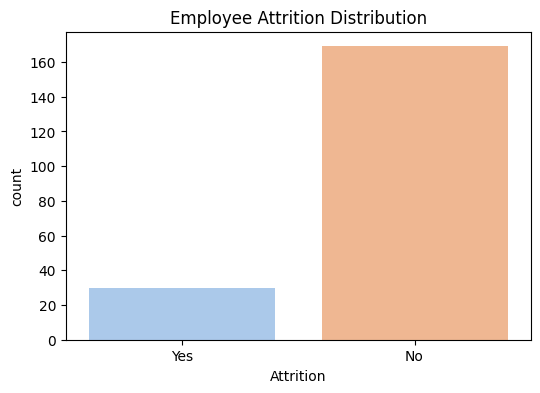

<ipython-input-10-0753c8cd61ce>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=feature, palette='pastel')


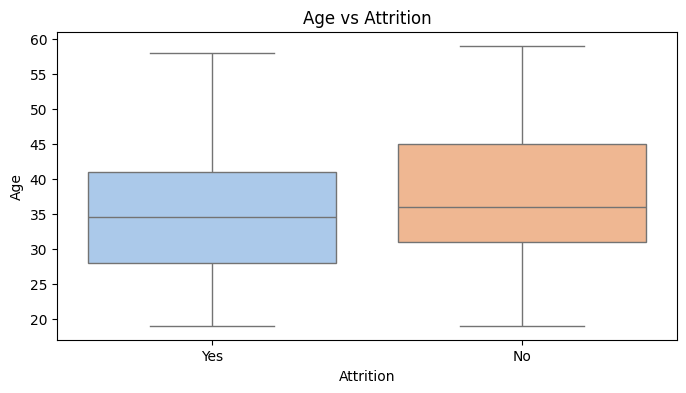

<ipython-input-10-0753c8cd61ce>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=feature, palette='pastel')


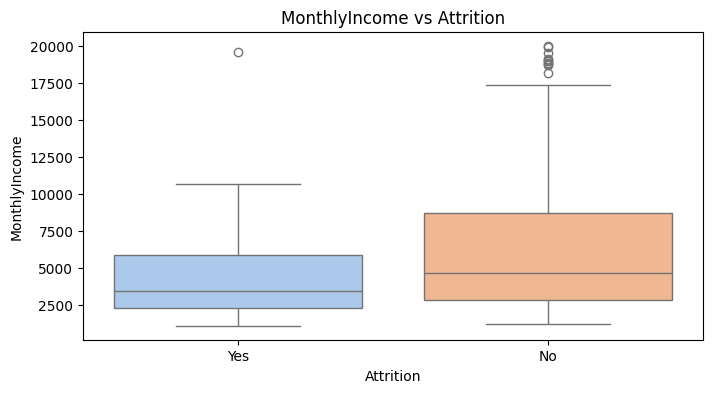

<ipython-input-10-0753c8cd61ce>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=feature, palette='pastel')


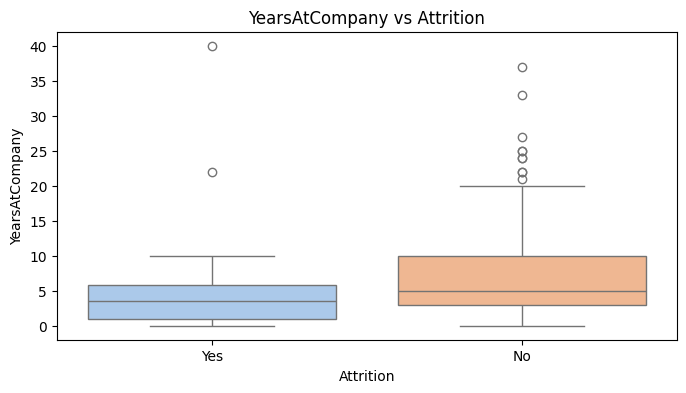

<ipython-input-10-0753c8cd61ce>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y=feature, palette='pastel')


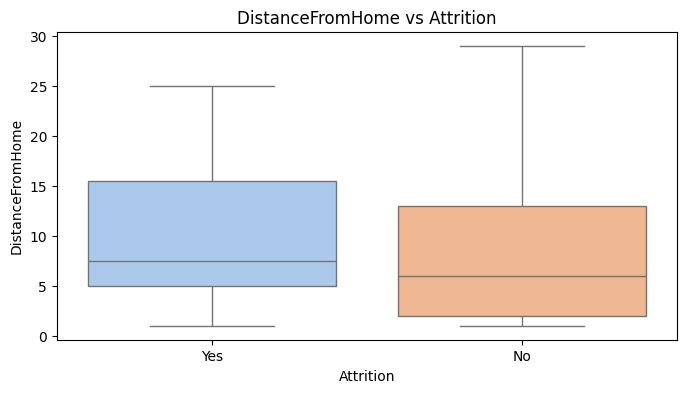

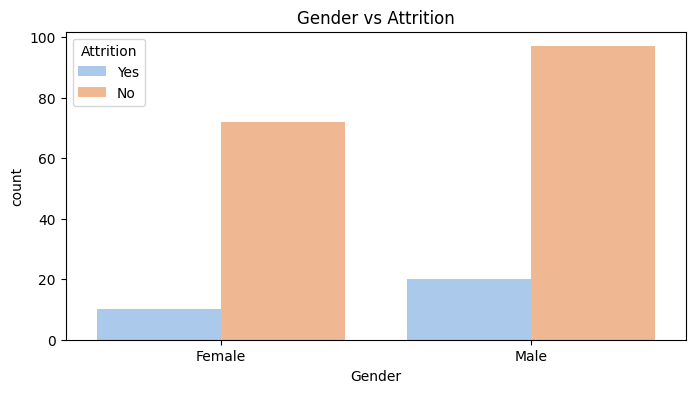

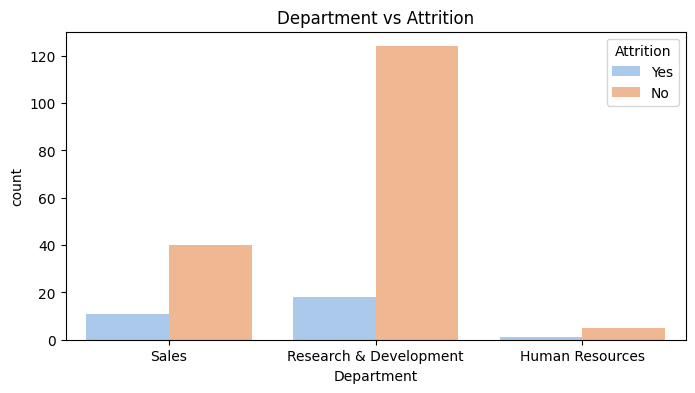

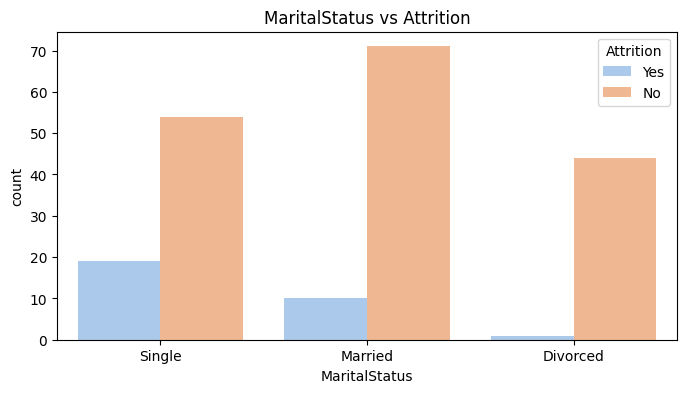

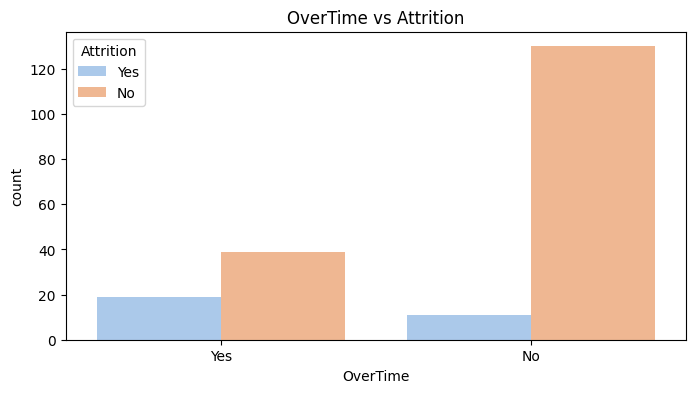

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'dataset.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Explore Attrition Distribution
# BOX Likely used to show the distribution of factors like job satisfaction or department-wise attrition rates.

attrition_counts = data['Attrition'].value_counts()
print("\nAttrition Distribution:")
print(attrition_counts)

# Plot Attrition Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition', palette='pastel')
plt.title("Employee Attrition Distribution")
plt.show()

# Analyze numerical features with attrition
numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='Attrition', y=feature, palette='pastel')
    plt.title(f'{feature} vs Attrition')
    plt.show()

# Analyze categorical features with attrition
categorical_features = ['Gender', 'Department', 'MaritalStatus', 'OverTime']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, hue='Attrition', palette='pastel')
    plt.title(f'{feature} vs Attrition')
    plt.legend(title='Attrition')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        33
           1       0.00      0.00      0.00         7

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40



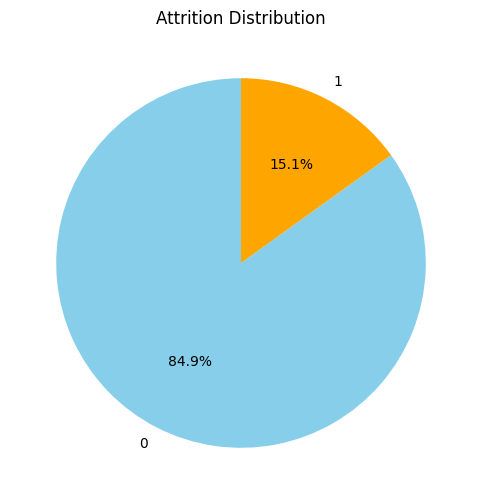

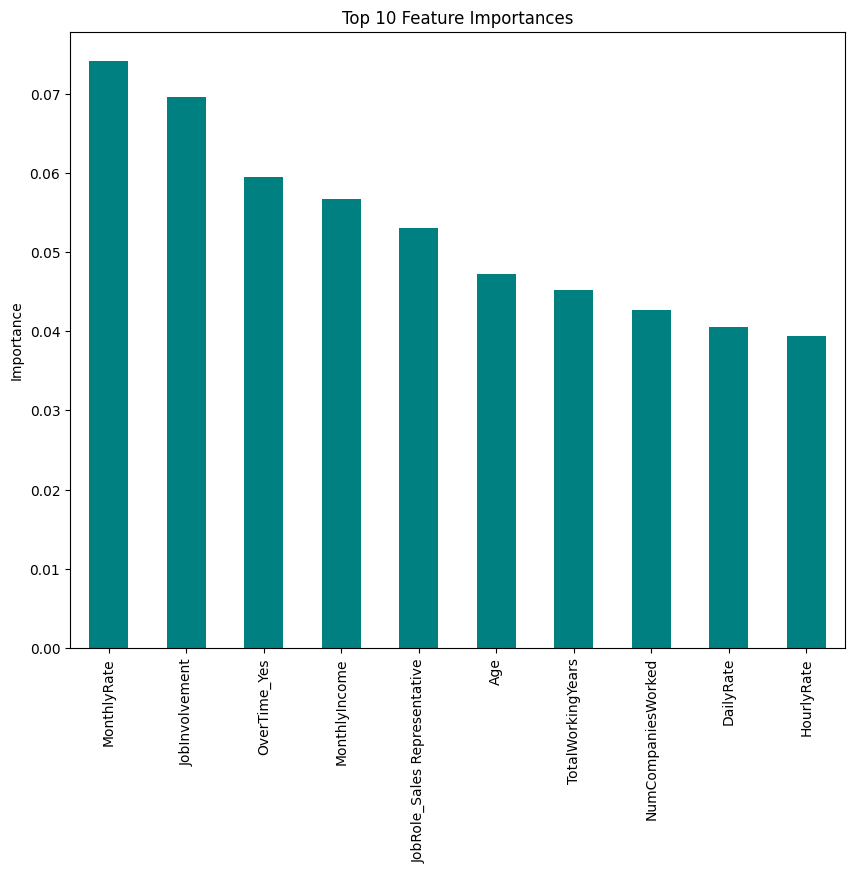

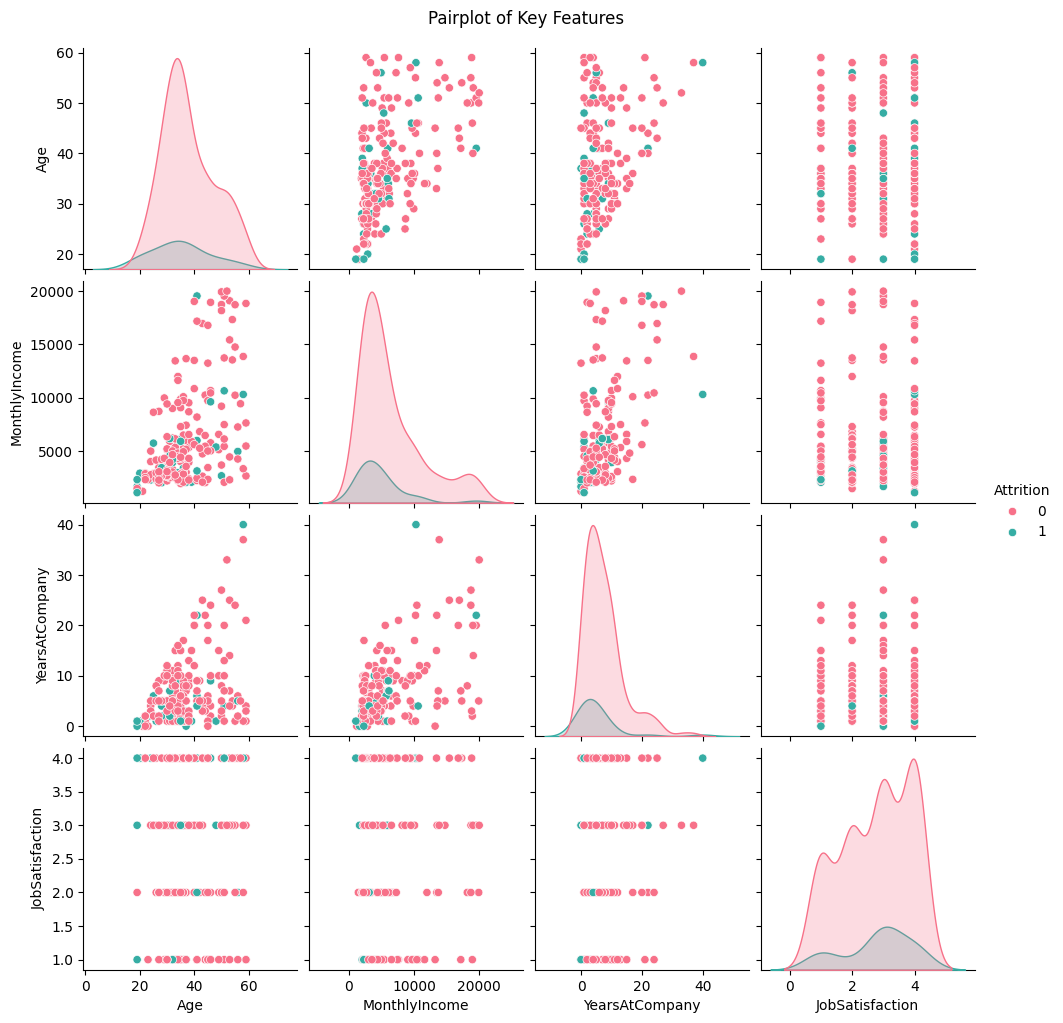

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = pd.read_csv('dataset.csv')

# Encode the target variable
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])

# Separate features and target
X = data.drop(['Attrition', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)
y = data['Attrition']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", report)

# Visualization: Attrition distribution
plt.figure(figsize=(8, 6))
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

# Visualization: Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feature_importances[:10].plot(kind='bar', color='teal')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

# Visualization: Pairplot of key features
key_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']
sns.pairplot(data, vars=key_features, hue='Attrition', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


<ipython-input-24-d8b8524603e1>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




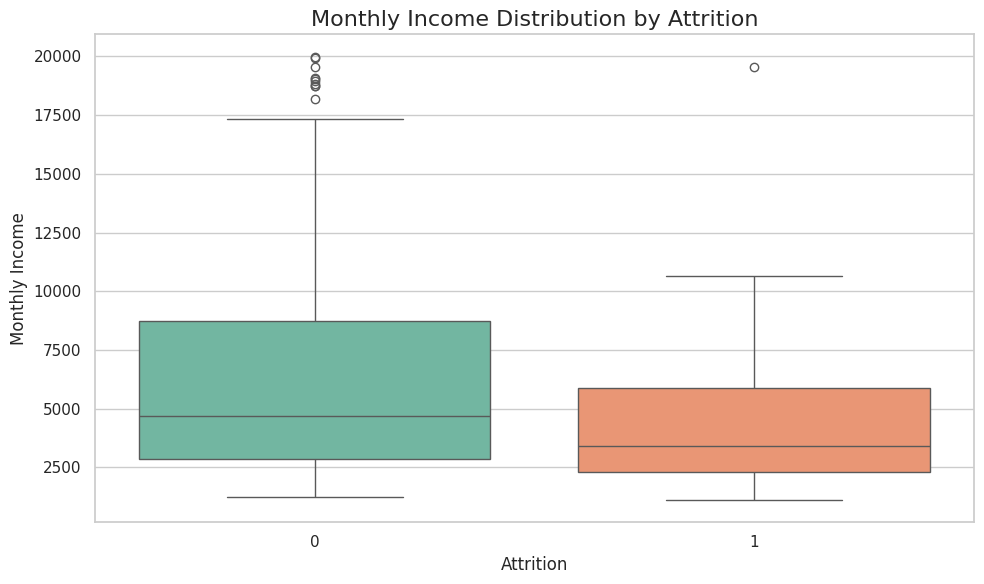

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Attrition", y="MonthlyIncome", palette="Set2")

# Add plot title and labels
plt.title("Monthly Income Distribution by Attrition", fontsize=16)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-25-e6fcf0719365>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




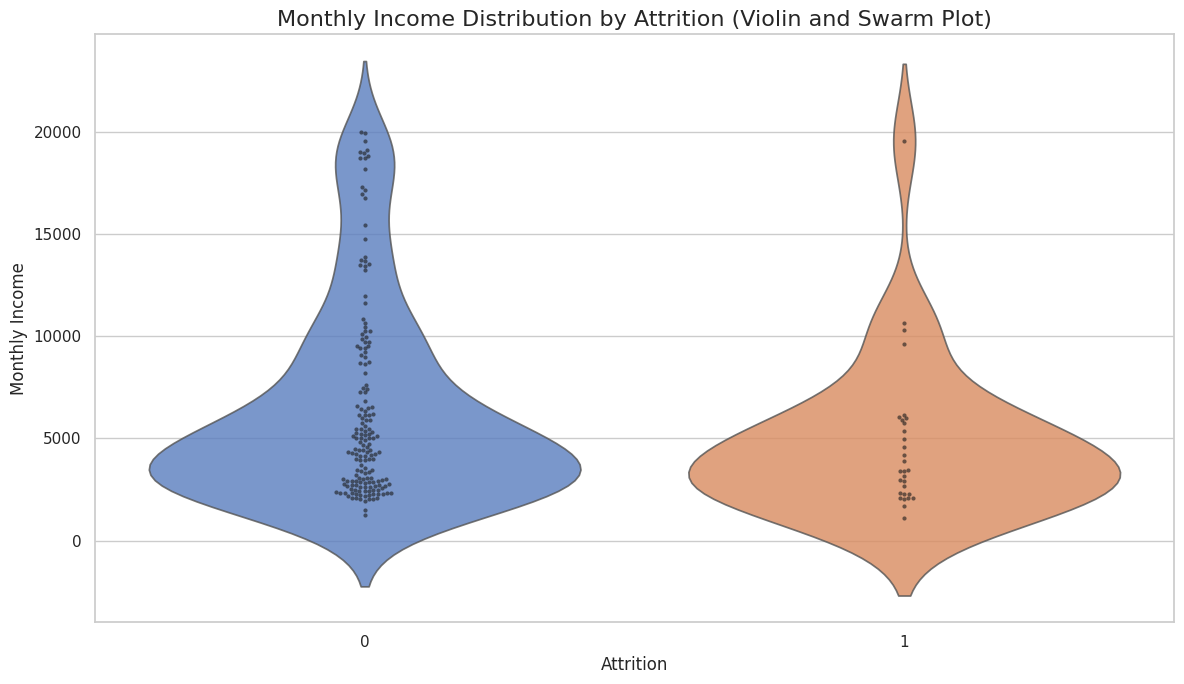

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(12, 7))

# Violin plot
sns.violinplot(data=data, x="Attrition", y="MonthlyIncome", palette="muted", inner=None, alpha=0.8)

# Swarm plot
sns.swarmplot(data=data, x="Attrition", y="MonthlyIncome", color="k", alpha=0.6, size=3)

# Add plot title and labels
plt.title("Monthly Income Distribution by Attrition (Violin and Swarm Plot)", fontsize=16)
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


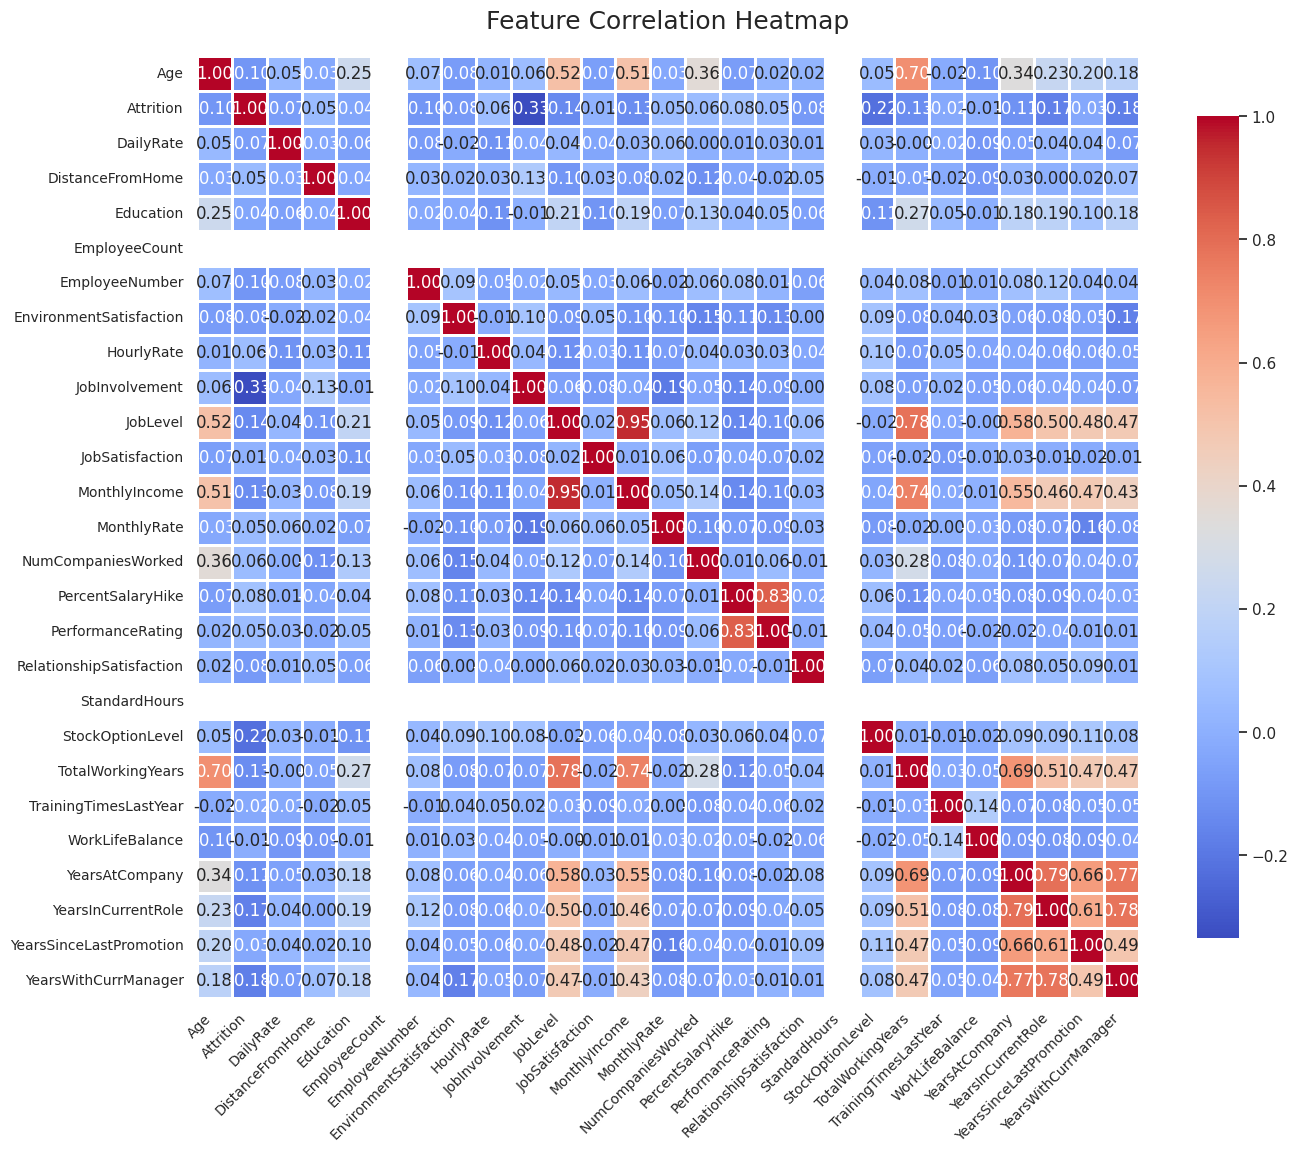

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.set_theme(style="white")

# Draw the heatmap with adjusted aesthetics
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display correlation values
    fmt=".2f",             # Format for correlation values
    cmap="coolwarm",       # Colormap
    linewidths=1,          # Line width between cells for clear separation
    linecolor='white',     # Line color for better contrast
    square=True,           # Make the heatmap square-shaped
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)

# Add title and labels
plt.title('Feature Correlation Heatmap', fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
#PIE To display percentages of attrition vs. retention.



INSIGHTS

The dataset indicates factors influencing employee attrition, including attributes like Age, JobRole, OverTime, and MonthlyIncome, which can reveal patterns about why employees leave.
Departments like Sales and Research & Development dominate the dataset, with varying levels of satisfaction and income influencing employee retention.
Key patterns such as higher attrition rates among employees with frequent travel or lower job satisfaction could be crucial insights for organizational improvement.

Conclusion


The dataset highlights key factors contributing to employee attrition, such as job satisfaction, frequent travel, overtime, and income levels. Addressing these issues through improved work-life balance, competitive compensation, and targeted employee engagement strategies can significantly enhance retention. By leveraging these insights, organizations can create a more sustainable and employee-centric work environment